In [ ]:
# import pandas as pd
# import numpy as np
# import os
# import matplotlib.pyplot as plt
# import chart_studio.plotly as py
# import plotly.graph_objs as go
# from sklearn.preprocessing import LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import RobustScaler
# from sklearn.impute import SimpleImputer
# from sklearn.metrics import accuracy_score
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import VotingClassifier
# import xgboost as xgb
# from sklearn.svm import SVC
# from sklearn.pipeline import make_pipeline
# from sklearn.model_selection import cross_val_predict
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import FunctionTransformer
# from sklearn.decomposition import PCA
# from sklearn.neural_network import MLPClassifier
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier 
# from sklearn.naive_bayes import GaussianNB 
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix,classification_report
# from sklearn.utils.multiclass import unique_labels
# print(os.getcwd())
# pd.set_option('display.max_rows', 500)

In [1]:
# imports 
import pandas as pd
import numpy as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
import matplotlib.pyplot as plt
import math
from sklearn.calibration import calibration_curve
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import learning_curve
from sklearn.model_selection import RandomizedSearchCV
import seaborn as sns
import pprint
pp = pprint.PrettyPrinter(indent=4)
%matplotlib inline

In [ ]:
friday_afternoon_ddos = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Friday-WorkingHours-Afternoon-DDos.csv',low_memory = False)
friday_afternoon_ddos = friday_afternoon_ddos.rename(str.lstrip, axis='columns')

In [ ]:
wednesday = wednesday.rename(str.lstrip, axis='columns')
wednesday = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Wednesday-workingHours.csv',low_memory = False)

In [272]:
## friday_afternoon_portscan = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Friday-WorkingHours-Afternoon-PortScan.csv',low_memory = False)
## friday_morning = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Friday-WorkingHours-Morning.csv',low_memory = False)
## monday = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Monday-WorkingHours.csv',low_memory = False)
## thursday_infilteration = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Thursday-WorkingHours-Afternoon-Infilteration.csv',low_memory = False)
## tuesday = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Tuesday-WorkingHours.csv',low_memory = False)
## thursday_webattacks = pd.read_csv('C:/Users/hp/Desktop/ThesisDataset/Thursday-WorkingHours-Morning-WebAttacks.csv', engine='python')
## friday_afternoon_portscan = friday_afternoon_portscan.rename(str.lstrip, axis='columns')
## friday_morning = friday_morning.rename(str.lstrip, axis='columns')
## monday = monday.rename(str.lstrip, axis='columns')
##thursday_infilteration = thursday_infilteration.rename(str.lstrip, axis='columns')
## thursday_webattacks = thursday_webattacks.rename(str.lstrip, axis='columns')
## tuesday = tuesday.rename(str.lstrip, axis='columns')

In [275]:
df = wednesday.copy(deep = True)

In [276]:
df.shape

(692703, 85)

In [277]:
df["Label"].value_counts()

BENIGN              440031
DoS Hulk            231073
DoS GoldenEye        10293
DoS slowloris         5796
DoS Slowhttptest      5499
Heartbleed              11
Name: Label, dtype: int64

In [278]:
df.isnull().sum(axis=0)

Flow ID                           0
Source IP                         0
Source Port                       0
Destination IP                    0
Destination Port                  0
Protocol                          0
Timestamp                         0
Flow Duration                     0
Total Fwd Packets                 0
Total Backward Packets            0
Total Length of Fwd Packets       0
Total Length of Bwd Packets       0
Fwd Packet Length Max             0
Fwd Packet Length Min             0
Fwd Packet Length Mean            0
Fwd Packet Length Std             0
Bwd Packet Length Max             0
Bwd Packet Length Min             0
Bwd Packet Length Mean            0
Bwd Packet Length Std             0
Flow Bytes/s                   1008
Flow Packets/s                    0
Flow IAT Mean                     0
Flow IAT Std                      0
Flow IAT Max                      0
Flow IAT Min                      0
Fwd IAT Total                     0
Fwd IAT Mean                

In [279]:
df.dropna()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.14-209.48.71.168-49459-80-6,192.168.10.14,49459,209.48.71.168,80,6,5/7/2017 8:42,38308,1,1,6,6.0,6,6,6.000000,0.000000,6,6,6.000000,0.000000,313.250496,52.208416,3.830800e+04,0.000000e+00,38308.0,38308.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,0.0,0,0,0,0,20,20,26.104208,26.104208,6,6,6.000000,0.000000,0.000000e+00,0,0,0,0,1,1,0,0,1,9.000000,6.000000,6.000000,20,0,0,0,0,0,0,1,6,1,6,255,946,0,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
1,192.168.10.3-192.168.10.17-389-49453-6,192.168.10.17,49453,192.168.10.3,389,6,5/7/2017 8:42,479,11,5,172,326.0,79,0,15.636364,31.449238,163,0,65.200000,89.278777,1039665.971,33402.92276,3.193333e+01,2.551041e+01,73.0,0.0,479.0,4.790000e+01,3.894284e+01,109.0,1.0,401.0,1.002500e+02,1.017362e+02,237.0,3.0,0,0,0,0,368,176,22964.509390,10438.413360,0,163,29.294118,56.529599,3.195596e+03,0,0,0,1,0,0,0,0,0,31.125000,15.636364,65.200000,368,0,0,0,0,0,0,11,172,5,326,29200,260,4,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
2,192.168.10.3-192.168.10.17-88-46124-6,192.168.10.17,46124,192.168.10.3,88,6,5/7/2017 8:42,1095,10,6,3150,3150.0,1575,0,315.000000,632.561635,1575,0,525.000000,813.326503,5753424.658,14611.87215,7.300000e+01,2.049610e+02,810.0,1.0,1095.0,1.216667e+02,2.987461e+02,915.0,1.0,995.0,1.990000e+02,3.455351e+02,810.0,3.0,0,0,0,0,336,208,9132.420091,5479.452055,0,1575,370.588235,671.751541,4.512501e+05,0,0,0,1,0,0,0,0,0,393.750000,315.000000,525.000000,336,0,0,0,0,0,0,10,3150,6,3150,29200,2081,3,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
3,192.168.10.3-192.168.10.17-389-49454-6,192.168.10.17,49454,192.168.10.3,389,6,5/7/2017 8:42,15206,17,12,3452,6660.0,1313,0,203.058824,425.778474,3069,0,555.000000,977.480342,665000.6576,1907.141918,5.430714e+02,2.519931e+03,13391.0,0.0,15206.0,9.503750e+02,3.322418e+03,13391.0,2.0,15112.0,1.373818e+03,4.176450e+03,13961.0,3.0,0,0,0,0,560,388,1117.979745,789.162173,0,3069,337.066667,704.654082,4.965374e+05,0,0,0,1,0,0,0,0,0,348.689655,203.058824,555.000000,560,0,0,0,0,0,0,17,3452,12,6660,29200,0,10,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
4,192.168.10.3-192.168.10.17-88-46126-6,192.168.10.17,46126,192.168.10.3,88,6,5/7/2017 8:42,1092,9,6,3150,3152.0,1575,0,350.000000,694.509719,1576,0,525.333333,813.842901,5771062.271,13736.26374,7.800000e+01,2.070009e+02,794.0,1.0,1092.0,1.365000e+02,3.138507e+02,910.0,1.0,1015.0,2.030000e+02,3.332402e+02,794.0,3.0,0,0,0,0,304,208,8241.758242,5494.505495,0,1576,393.875000,704.585067,4.964401e+05,0,0,0,1,0,0,0,0,0,420.133333,350.000000,525.333333,304,0,0,0,0,0,0,9,3150,6,3152,29200,2081,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN
5,192.

In [280]:
for x in df.columns:
    if(df[x].nunique() < 2):
        del df[x]
    else:
        print(x, df[x].nunique())

Flow ID 226768
Source IP 7689
Source Port 54556
Destination IP 9012
Destination Port 30094
Protocol 3
Timestamp 509
Flow Duration 363185
Total Fwd Packets 685
Total Backward Packets 859
Total Length of Fwd Packets 9380
Total Length of Bwd Packets 23483
Fwd Packet Length Max 3728
Fwd Packet Length Min 220
Fwd Packet Length Mean 31471
Fwd Packet Length Std 63498
Bwd Packet Length Max 3836
Bwd Packet Length Min 429
Bwd Packet Length Mean 41095
Bwd Packet Length Std 55643
Flow Bytes/s 450841
Flow Packets/s 387031
Flow IAT Mean 370810
Flow IAT Std 222370
Flow IAT Max 148528
Flow IAT Min 47743
Fwd IAT Total 100832
Fwd IAT Mean 162817
Fwd IAT Std 142925
Fwd IAT Max 98682
Fwd IAT Min 37400
Bwd IAT Total 111743
Bwd IAT Mean 181207
Bwd IAT Std 211343
Bwd IAT Max 105600
Bwd IAT Min 18812
Fwd PSH Flags 2
Fwd Header Length 1746
Bwd Header Length 1910
Fwd Packets/s 382443
Bwd Packets/s 358777
Min Packet Length 166
Max Packet Length 4469
Packet Length Mean 61803
Packet Length Std 135696
Packet Length

In [281]:
len(df.columns)

75

In [282]:
print(df['Label'].unique())

['BENIGN' 'DoS slowloris' 'DoS Slowhttptest' 'DoS Hulk' 'DoS GoldenEye'
 'Heartbleed']


In [283]:
df.columns

Index(['Flow ID', 'Source IP', 'Source Port', 'Destination IP',
       'Destination Port', 'Protocol', 'Timestamp', 'Flow Duration',
       'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd Header Length', 'Bwd Header Length', 'Fwd Packets/s',
       'Bwd Packets/s', 'Min Packet Length', 'Max Packet Length',
       'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance',
      

In [284]:
# Friday Afternoon DDoS
df = df.drop(columns=[ "Flow Bytes/s",
                      "Flow ID",
                      'Idle Max', 
                      'Idle Mean', 
                      'act_data_pkt_fwd', 
                      'Bwd Packet Length Min', 
                      'Fwd IAT Total', 'Subflow Fwd Packets', 
                      'Subflow Fwd Bytes',
                     'Subflow Bwd Packets', 
                      'Subflow Bwd Bytes',
                      'Fwd IAT Max', 
                      'Min Packet Length', 
                      'Flow IAT Mean', 
                      'Flow IAT Std', 
                      'Flow IAT Max',
                     'Fwd IAT Mean', 
                      'Fwd IAT Std', 
                      'Fwd IAT Max',
                      'Total Backward Packets',
                      'Total Length of Bwd Packets',
                     'Fwd Header Length', 
                      'Bwd Header Length', 
                      'Fwd Header Length.1', 
                      'Total Length of Fwd Packets', 
                      'Avg Fwd Segment Size',  
                      'Avg Bwd Segment Size', 
                      'Average Packet Size' ,
                     'RST Flag Count', 
                      'Active Min',
                      'Fwd Packet Length Max' ,
                      'Max Packet Length',
                      'Bwd Packet Length Mean',
                     'Packet Length Mean', 
                      'Packet Length Std', 
                      'Packet Length Variance',
                      'Fwd Packet Length Mean',
                      'Bwd Packet Length Max',
                     'Bwd IAT Max', 
                      'Fwd PSH Flags', 
                      'Fwd IAT Min', 
                      'Bwd IAT Total', 
                      'Bwd IAT Mean', 
                      "Timestamp"])

In [285]:
df = df.drop(columns=['Source IP', 'Source Port', 'Destination IP', 'Destination Port']) 

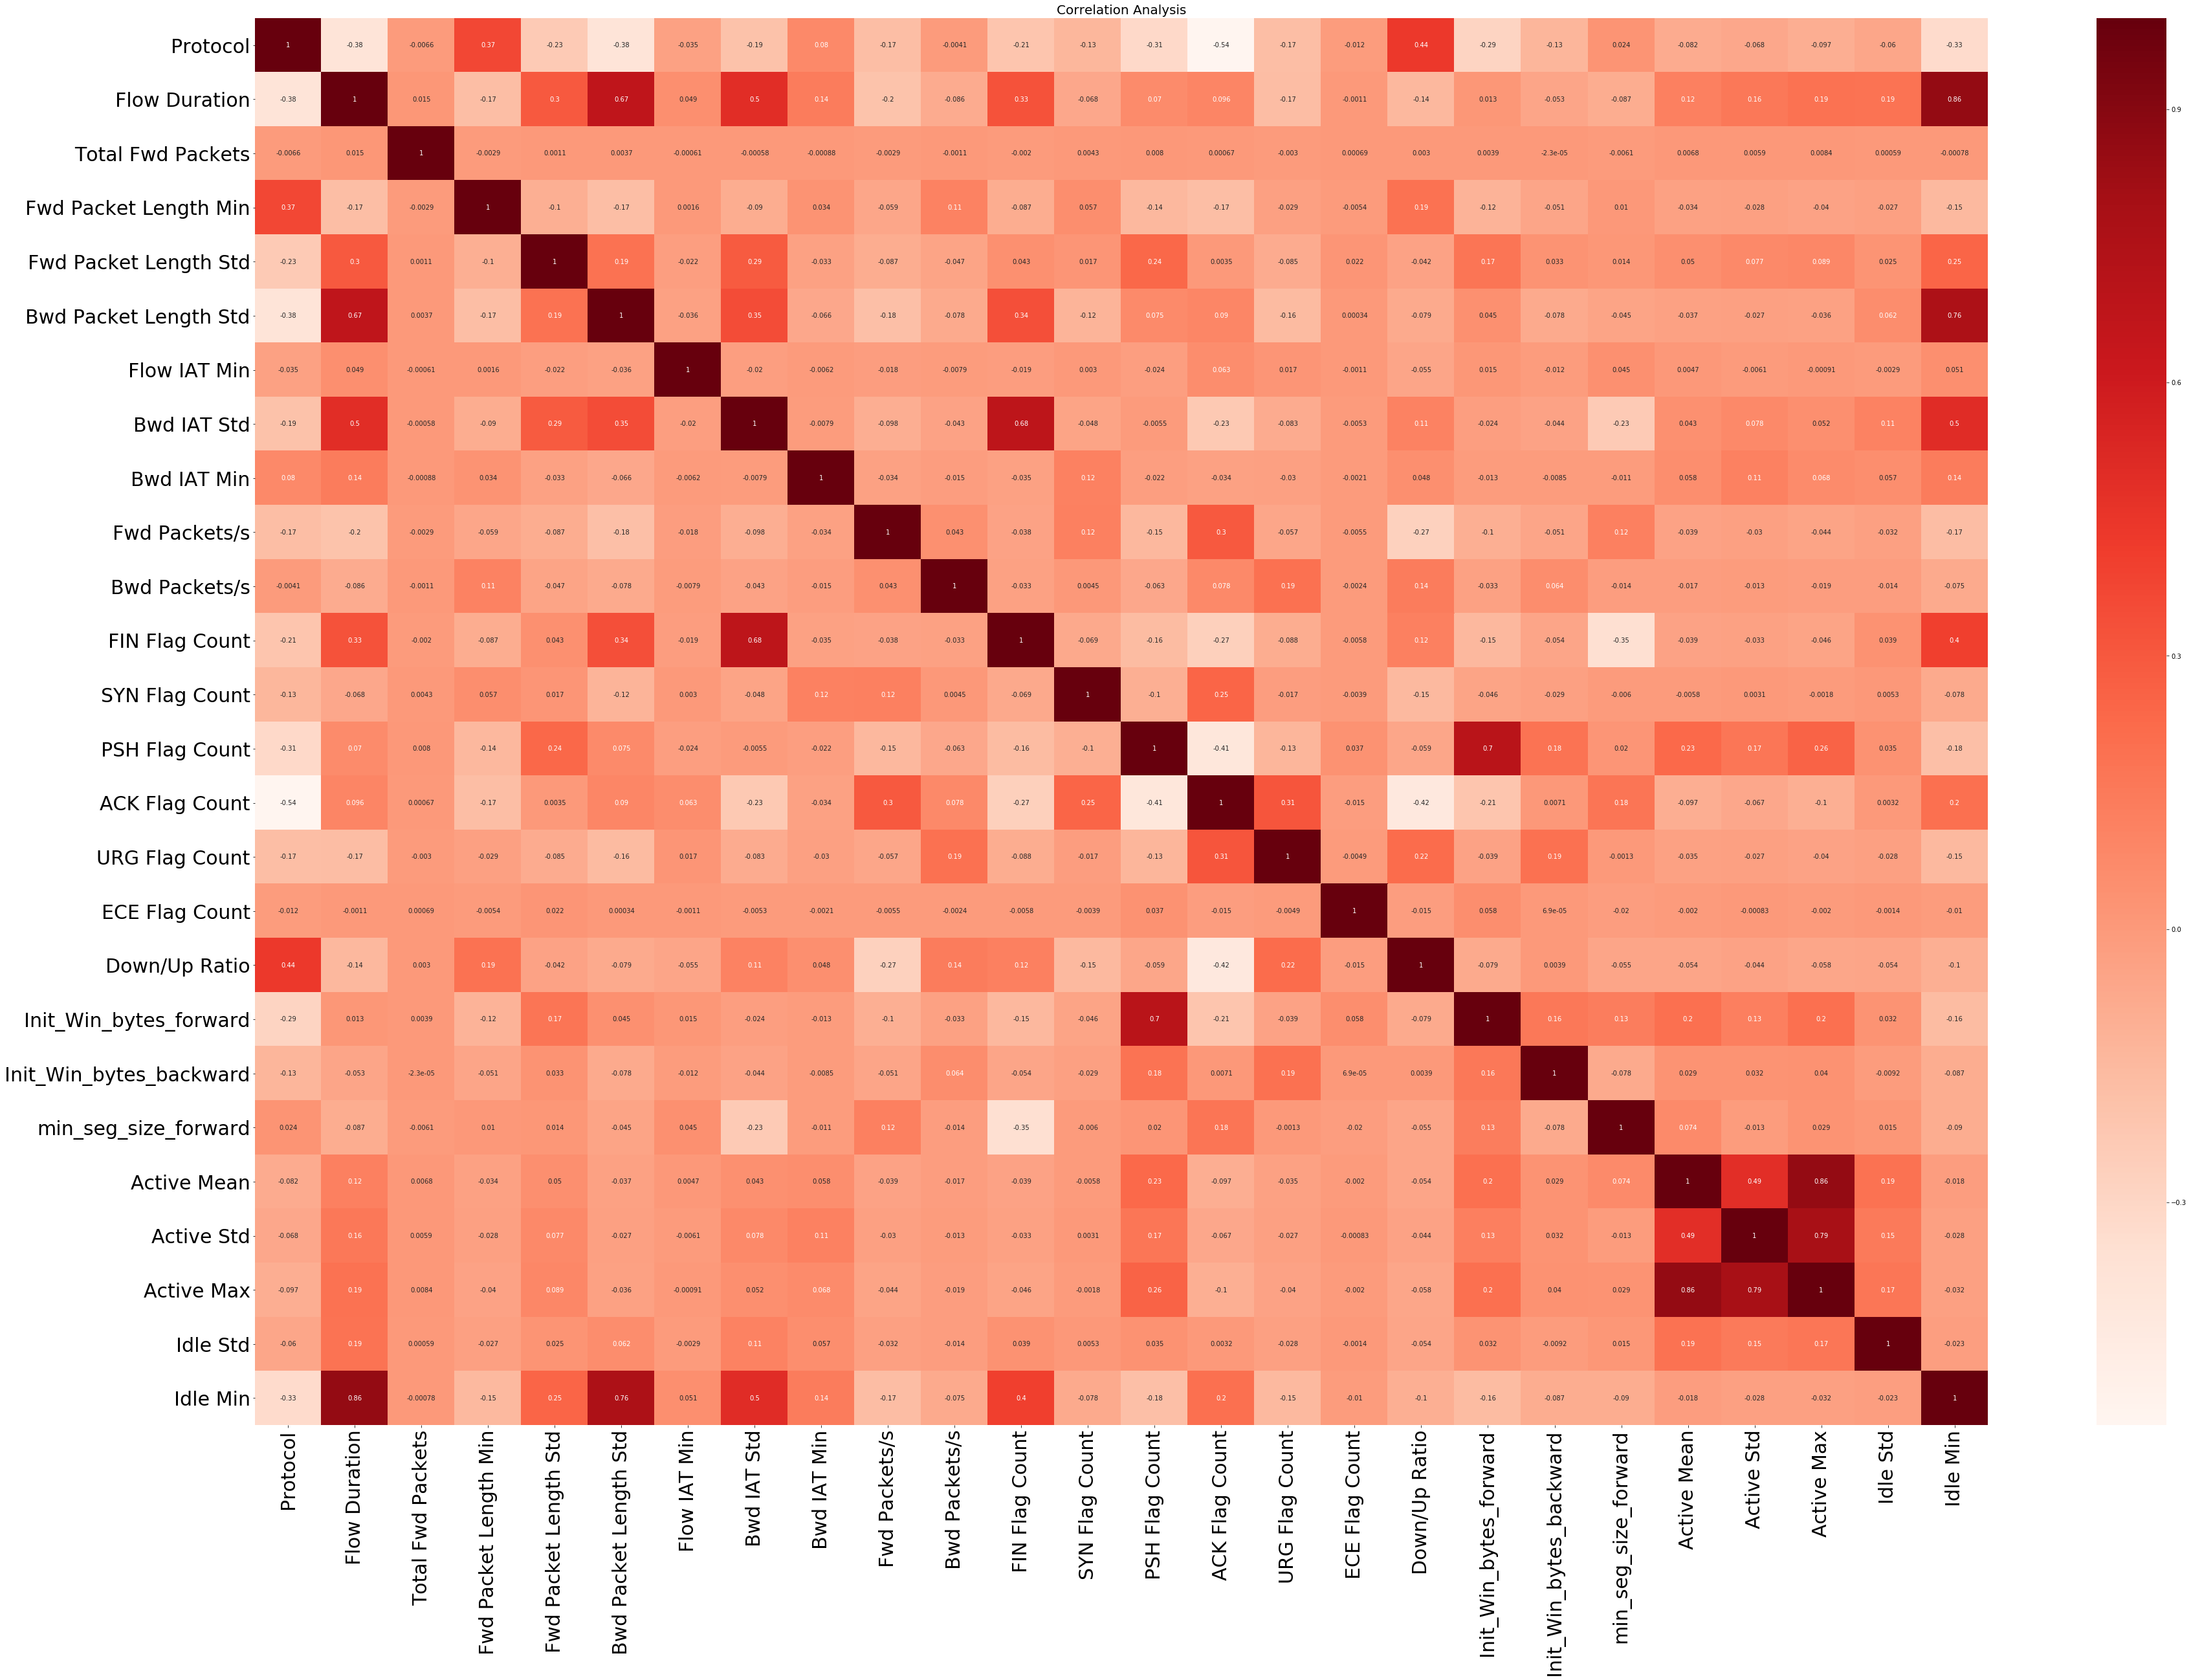

In [286]:
plt.figure(figsize=(60,40))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Correlation Analysis", {"fontsize": 20});
plt.xticks(rotation=90, fontsize= 30)
plt.yticks(rotation=0,fontsize= 30)
plt.show()

In [287]:
df.columns

Index(['Protocol', 'Flow Duration', 'Total Fwd Packets',
       'Fwd Packet Length Min', 'Fwd Packet Length Std',
       'Bwd Packet Length Std', 'Flow Packets/s', 'Flow IAT Min',
       'Bwd IAT Std', 'Bwd IAT Min', 'Fwd Packets/s', 'Bwd Packets/s',
       'FIN Flag Count', 'SYN Flag Count', 'PSH Flag Count', 'ACK Flag Count',
       'URG Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Init_Win_bytes_forward', 'Init_Win_bytes_backward',
       'min_seg_size_forward', 'Active Mean', 'Active Std', 'Active Max',
       'Idle Std', 'Idle Min', 'Label'],
      dtype='object')

In [288]:
df.isnull().sum(axis=0)

Protocol                   0
Flow Duration              0
Total Fwd Packets          0
Fwd Packet Length Min      0
Fwd Packet Length Std      0
Bwd Packet Length Std      0
Flow Packets/s             0
Flow IAT Min               0
Bwd IAT Std                0
Bwd IAT Min                0
Fwd Packets/s              0
Bwd Packets/s              0
FIN Flag Count             0
SYN Flag Count             0
PSH Flag Count             0
ACK Flag Count             0
URG Flag Count             0
ECE Flag Count             0
Down/Up Ratio              0
Init_Win_bytes_forward     0
Init_Win_bytes_backward    0
min_seg_size_forward       0
Active Mean                0
Active Std                 0
Active Max                 0
Idle Std                   0
Idle Min                   0
Label                      0
dtype: int64

In [289]:
len(df.columns)

28

In [290]:
for x in df.columns:
    print(x, df[x].nunique())

Protocol 3
Flow Duration 363185
Total Fwd Packets 685
Fwd Packet Length Min 220
Fwd Packet Length Std 63498
Bwd Packet Length Std 55643
Flow Packets/s 387031
Flow IAT Min 47743
Bwd IAT Std 211343
Bwd IAT Min 18812
Fwd Packets/s 382443
Bwd Packets/s 358777
FIN Flag Count 2
SYN Flag Count 2
PSH Flag Count 2
ACK Flag Count 2
URG Flag Count 2
ECE Flag Count 2
Down/Up Ratio 17
Init_Win_bytes_forward 5698
Init_Win_bytes_backward 6049
min_seg_size_forward 13
Active Mean 78864
Active Std 44220
Active Max 76777
Idle Std 41528
Idle Min 43869
Label 6


In [291]:
for c in df.columns:
    df[c] = df[c].fillna('NA')

In [292]:
df = df[df["Label"] != "NA"]

In [293]:
df["Label"].unique()

array(['BENIGN', 'DoS slowloris', 'DoS Slowhttptest', 'DoS Hulk',
       'DoS GoldenEye', 'Heartbleed'], dtype=object)

In [294]:
df.isnull().sum(axis=0)

Protocol                   0
Flow Duration              0
Total Fwd Packets          0
Fwd Packet Length Min      0
Fwd Packet Length Std      0
Bwd Packet Length Std      0
Flow Packets/s             0
Flow IAT Min               0
Bwd IAT Std                0
Bwd IAT Min                0
Fwd Packets/s              0
Bwd Packets/s              0
FIN Flag Count             0
SYN Flag Count             0
PSH Flag Count             0
ACK Flag Count             0
URG Flag Count             0
ECE Flag Count             0
Down/Up Ratio              0
Init_Win_bytes_forward     0
Init_Win_bytes_backward    0
min_seg_size_forward       0
Active Mean                0
Active Std                 0
Active Max                 0
Idle Std                   0
Idle Min                   0
Label                      0
dtype: int64

In [295]:
cleandf = df.copy(deep=True)

In [296]:
df.dtypes

Protocol                     int64
Flow Duration                int64
Total Fwd Packets            int64
Fwd Packet Length Min        int64
Fwd Packet Length Std      float64
Bwd Packet Length Std      float64
Flow Packets/s              object
Flow IAT Min               float64
Bwd IAT Std                float64
Bwd IAT Min                float64
Fwd Packets/s              float64
Bwd Packets/s              float64
FIN Flag Count               int64
SYN Flag Count               int64
PSH Flag Count               int64
ACK Flag Count               int64
URG Flag Count               int64
ECE Flag Count               int64
Down/Up Ratio                int64
Init_Win_bytes_forward       int64
Init_Win_bytes_backward      int64
min_seg_size_forward         int64
Active Mean                float64
Active Std                 float64
Active Max                 float64
Idle Std                   float64
Idle Min                   float64
Label                       object
dtype: object

In [297]:
encoded_df = pd.DataFrame()
labelencoders = {}
for c in df.columns:
    if c in ["Flow ID","Source IP", "Destination IP", "Timestamp", "Flow Bytes/s", "Flow Packets/s", "Label" ]:
        labelencoders[c] = LabelEncoder()
        encoded_df[c] = labelencoders[c].fit_transform(df[c])
    else:
        print(c)
        encoded_df[c] = df[c]

Protocol
Flow Duration
Total Fwd Packets
Fwd Packet Length Min
Fwd Packet Length Std
Bwd Packet Length Std
Flow IAT Min
Bwd IAT Std
Bwd IAT Min
Fwd Packets/s
Bwd Packets/s
FIN Flag Count
SYN Flag Count
PSH Flag Count
ACK Flag Count
URG Flag Count
ECE Flag Count
Down/Up Ratio
Init_Win_bytes_forward
Init_Win_bytes_backward
min_seg_size_forward
Active Mean
Active Std
Active Max
Idle Std
Idle Min


In [298]:
encoded_df.dtypes

Protocol                     int64
Flow Duration                int64
Total Fwd Packets            int64
Fwd Packet Length Min        int64
Fwd Packet Length Std      float64
Bwd Packet Length Std      float64
Flow Packets/s               int32
Flow IAT Min               float64
Bwd IAT Std                float64
Bwd IAT Min                float64
Fwd Packets/s              float64
Bwd Packets/s              float64
FIN Flag Count               int64
SYN Flag Count               int64
PSH Flag Count               int64
ACK Flag Count               int64
URG Flag Count               int64
ECE Flag Count               int64
Down/Up Ratio                int64
Init_Win_bytes_forward       int64
Init_Win_bytes_backward      int64
min_seg_size_forward         int64
Active Mean                float64
Active Std                 float64
Active Max                 float64
Idle Std                   float64
Idle Min                   float64
Label                        int32
dtype: object

In [299]:
labelencoders["Label"].classes_

array(['BENIGN', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
       'DoS slowloris', 'Heartbleed'], dtype=object)

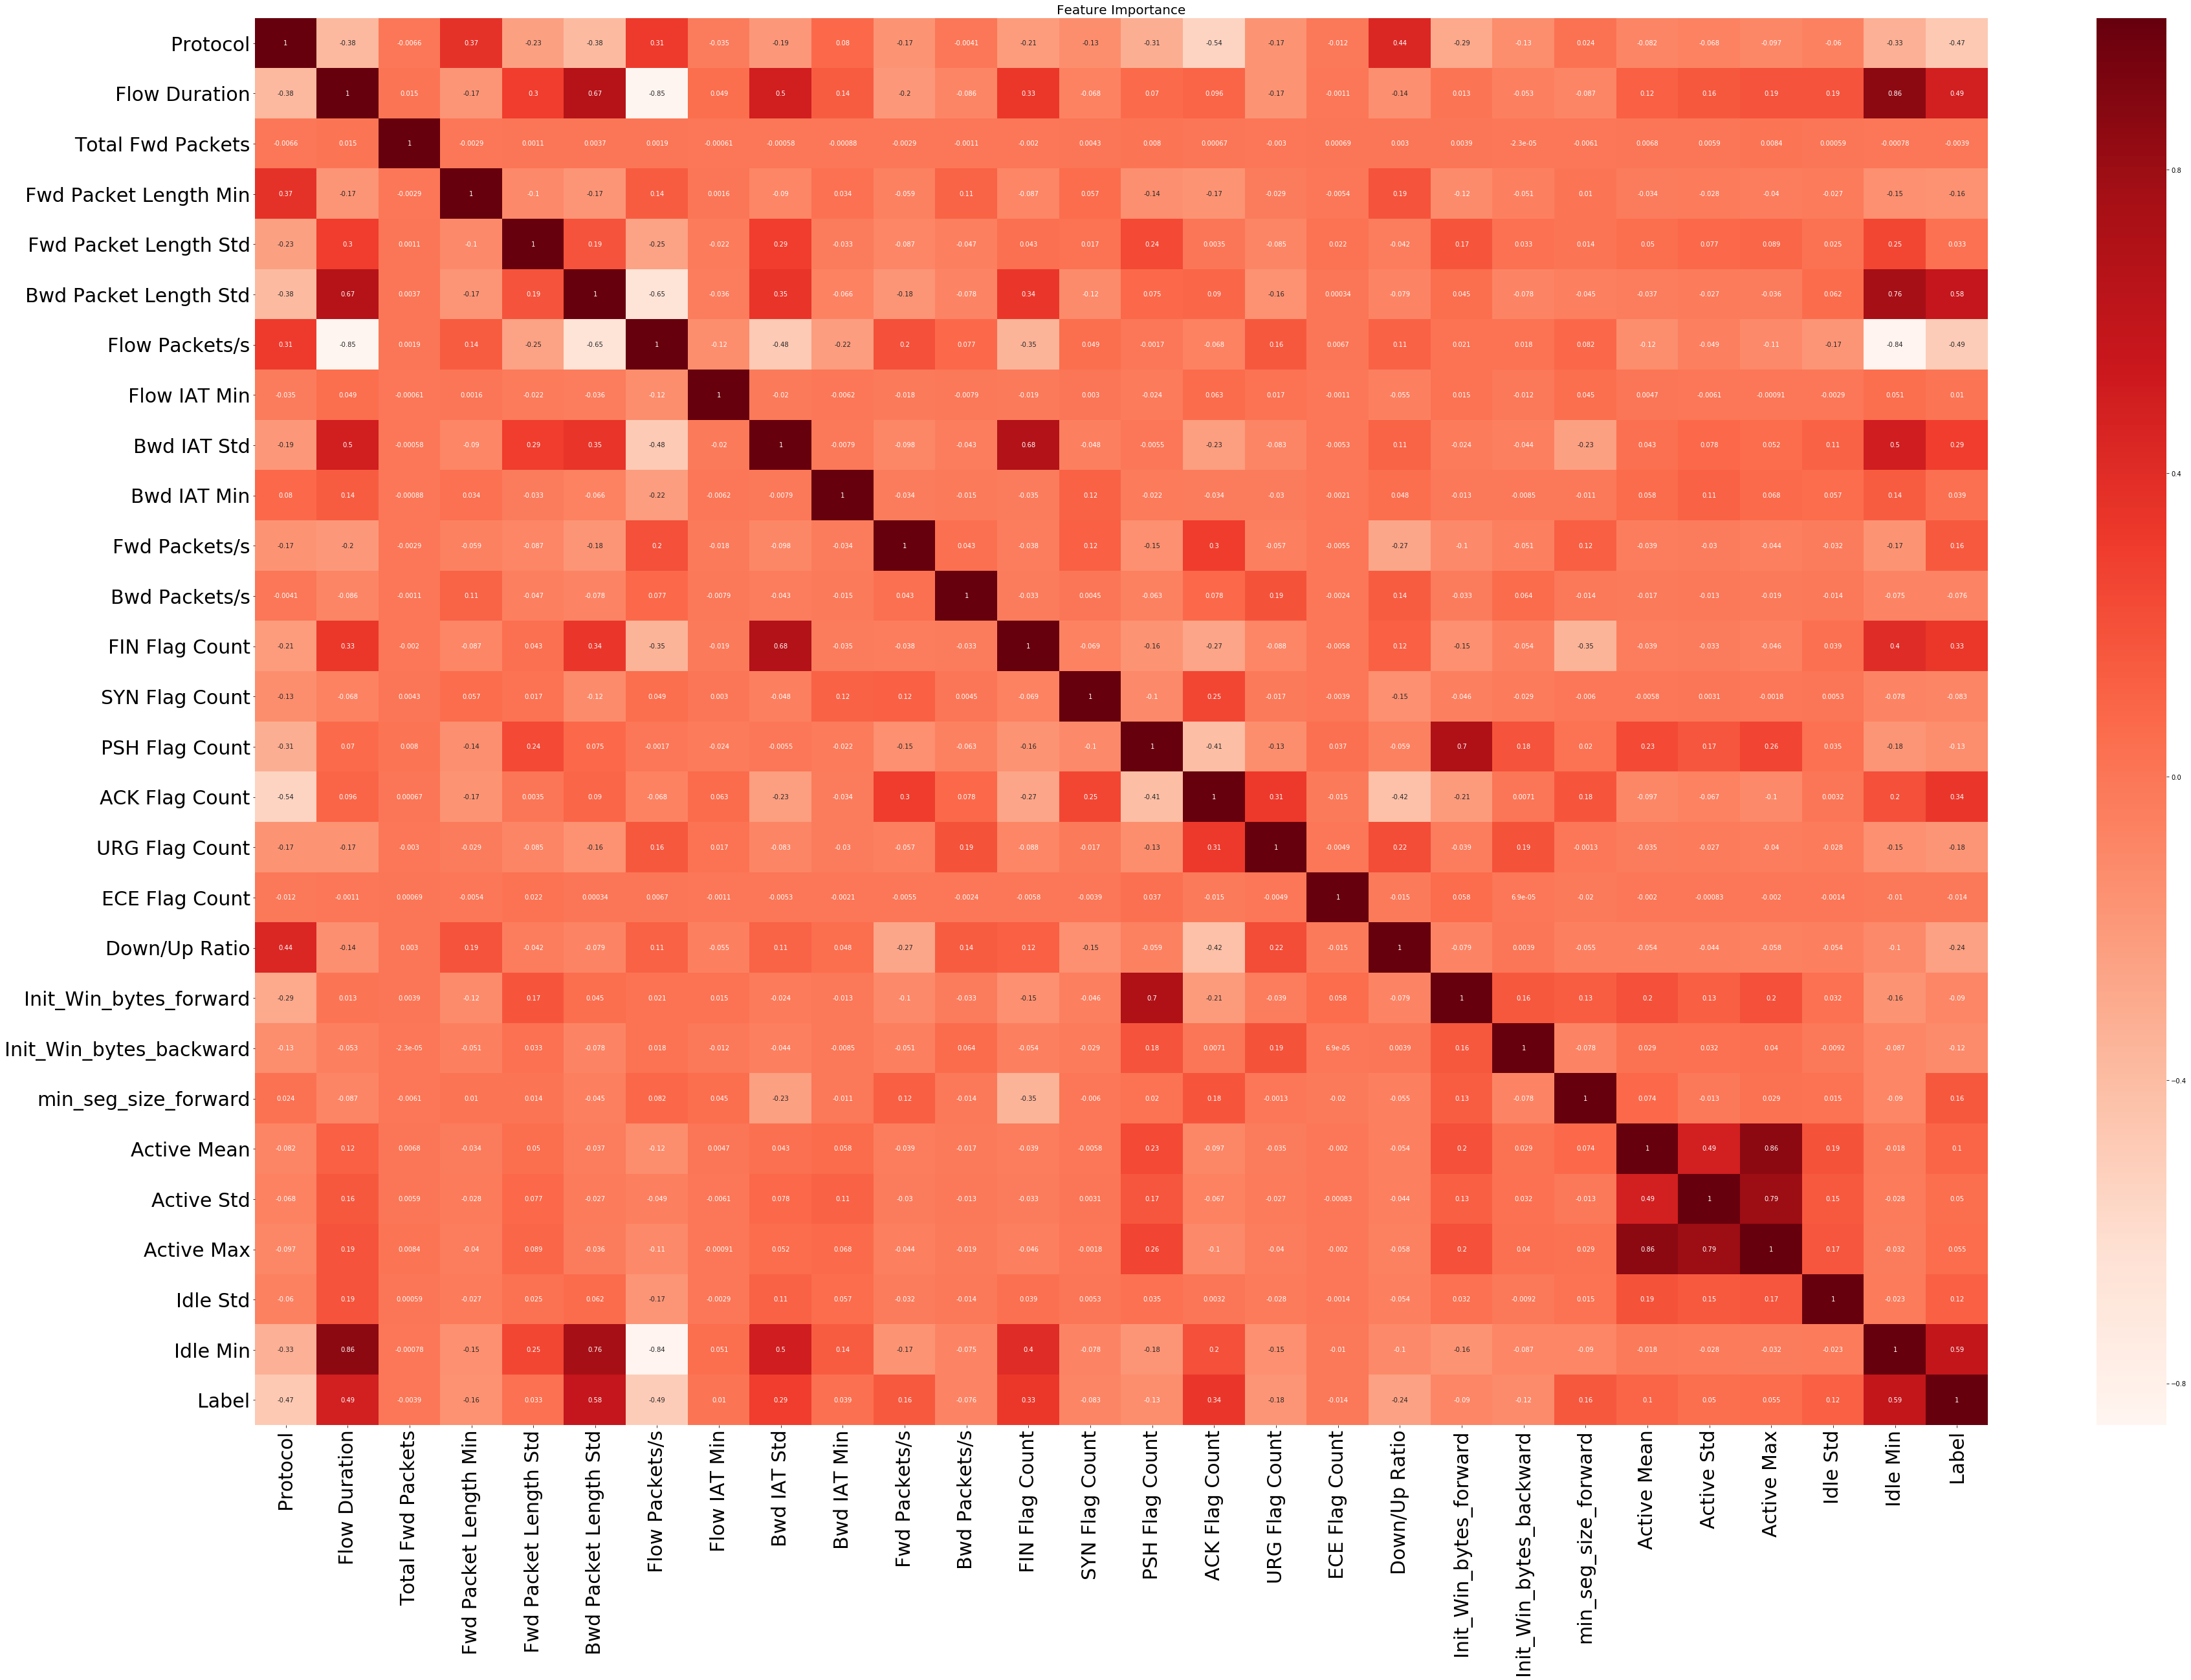

In [300]:
plt.figure(figsize=(60,40))
cor = encoded_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.title("Feature Importance", {"fontsize": 20});
plt.xticks(rotation=90, fontsize= 30)
plt.yticks(rotation=0,fontsize= 30)
plt.show()

In [301]:
import json
class ConfusionMatrix(object):
    def __init__(self, matrix):
        self.matrix = matrix
    def json(self):
        return json.dumps({'confusion_matrix'})
    @staticmethod
    def parse_raw(content):
        data_dict = json.loads(content)
        df = pd.read_json(data_dict["confusion_matrix"])
        return ConfusionMatrix(df)
    @staticmethod
    def schema_json():
        return '{"definitions":{},"$schema":"http://json-schema.org/draft-07/schema#","$id":"http://example.com/root.json","type":"object","title":"The Root Schema","required":["confusion_matrix"],"properties":{"confusion_matrix":{"$id":"#/properties/confusion_matrix","type":"string","title":"The Confusion_matrix Schema","default":"","pattern":"^(.*)$"}}}'


In [302]:
data_df = encoded_df.copy(deep=True)

In [303]:
y = encoded_df.loc[:, encoded_df.columns == "Label"].values.flatten()

In [304]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [305]:
X = encoded_df.loc[:, encoded_df.columns != "Label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=123,stratify = y)

In [306]:
X

array([[6.000000e+00, 3.830800e+04, 1.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [6.000000e+00, 4.790000e+02, 1.100000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [6.000000e+00, 1.095000e+03, 1.000000e+01, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [6.000000e+00, 8.200000e+01, 2.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.700000e+01, 1.048635e+06, 6.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.700000e+01, 9.493900e+04, 4.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]])

In [307]:
std = RobustScaler()
std.fit(X_train)
X_train = std.transform(X_train)
X_test = std.transform(X_test)

In [308]:
rf_clf = RandomForestClassifier(n_estimators=500, max_features=0.25, criterion="entropy", class_weight="balanced")

In [309]:
a = df["Label"].value_counts().to_dict()
s = []
ss = []
for x, y in a.items():
    s.append(x)
    ss.append(y)

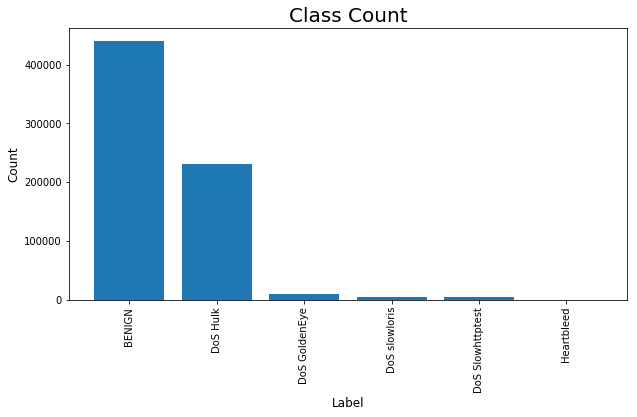

In [310]:
plt.figure(figsize=(10,5))
plt.bar(s, ss, align='center')
plt.xticks(range(0, len(ss)), rotation=90, fontsize=10)
plt.title("Class Count", fontsize=20)
plt.xlabel("Label", fontsize=12) 
plt.ylabel("Count", fontsize=12)
plt.show()

In [311]:
theme_df = pd.DataFrame.from_records([a])

In [312]:
theme_df.index = ["Class_Count"]

In [313]:
theme_df.T

,Class_Count
BENIGN,440031
DoS GoldenEye,10293
DoS Hulk,231073
DoS Slowhttptest,5499
DoS slowloris,5796
Heartbleed,11


In [314]:
logreg_clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial',n_jobs = 3)

ann_clf = MLPClassifier(activation = 'logistic')

lda_clf = LinearDiscriminantAnalysis(solver='svd')

knn_clf = KNeighborsClassifier(n_neighbors=3)

nb_clf = GaussianNB()

dtree_clf = DecisionTreeClassifier()

ada_clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth=30, class_weight= 'balanced', min_samples_split = 5, min_samples_leaf = 4, max_features = 'sqrt', criterion = 'entropy'), n_estimators = 50, learning_rate = 0.01)

xgb_clf = xgb.XGBClassifier(learning_rate=0.1, n_estimators=140, max_depth=20, eta = 0.3, num_class = 2,min_child_weight=3, gamma=0.2, subsample=0.6, colsample_bytree=1.0,objective='multi:softprob', nthread=4, scale_pos_weight=1, seed=27)



In [315]:
models = {"logreg": logreg_clf,
            "rf": rf_clf,
            "Neural-Network": ann_clf,
            "LDA" : lda_clf,
            "KNN" : knn_clf,
            "Naive-Bayes" : nb_clf,
            "Decision-Tree" : dtree_clf,
            "ada" : ada_clf,
            "xgb" : xgb_clf
         }


In [316]:
# Scores = {}
# def Utility():
#     for  name, x in models.items():
#         print(name)
#         score = cross_val_score(x, X, y, cv=7)
#         Scores[name] = score
#         print(score) 
# Utility()

In [317]:
from sklearn import model_selection
seed = 2116846
scoring = 'accuracy'
result = []
results = {}
names = []

In [318]:
y = encoded_df.loc[:, encoded_df.columns == "Label"].values.flatten()

In [319]:
import copy 
results_dict = copy.deepcopy(results)

In [320]:
for name, model in models.items():
    if(name not in results.keys()):
        kfold = model_selection.KFold(n_splits=7, random_state=seed)
        cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
        results[name] = cv_results
        result.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    else:
        print(name, "already done")

logreg: 0.838688 (0.105441)
rf: 0.979836 (0.039311)
Neural-Network: 0.779692 (0.080280)
LDA: 0.878830 (0.064425)
KNN: 0.958122 (0.043659)
Naive-Bayes: 0.375503 (0.346068)
Decision-Tree: 0.980977 (0.039408)
ada: 0.979932 (0.039234)
xgb: 0.981975 (0.039471)


In [321]:
results_dict = copy.deepcopy(results)
print(results_dict)

{'logreg': array([0.71864832, 0.72723782, 0.76380889, 0.78903171, 0.97562578,
       0.95747648, 0.9389836 ]), 'rf': array([0.8851533 , 0.99971705, 0.99970695, 0.97847572, 0.99967663,
       0.99923199, 0.99688754]), 'Neural-Network': array([0.65373189, 0.72465086, 0.82142929, 0.74111239, 0.75565144,
       0.84876259, 0.91250745]), 'LDA': array([0.73428121, 0.89864387, 0.9299905 , 0.84766264, 0.92218843,
       0.92391645, 0.89512617]), 'KNN': array([0.86049637, 0.98345763, 0.97582813, 0.93198124, 0.98584234,
       0.98424568, 0.98500359]), 'Naive-Bayes': array([0.25493644, 0.89366196, 0.92338164, 0.2922553 , 0.0872096 ,
       0.10280223, 0.07427468]), 'Decision-Tree': array([0.88492088, 0.99954526, 0.99937347, 0.98781301, 0.99941389,
       0.99893893, 0.99683701]), 'ada': array([0.88532509, 0.99958568, 0.99968674, 0.97919319, 0.99960589,
       0.9992522 , 0.99687743]), 'xgb': array([0.88547667, 0.99986863, 0.999808  , 0.99265345, 0.9998181 ,
       0.99934315, 0.99685722])}


In [ ]:
import Image
plt.savefig('friday_afternoon_ddos.png')
Image.open('friday_afternoon_ddos.png').save('friday_afternoon_ddos.jpg','JPEG')

In [112]:
classes=list(labelencoders["Label"].classes_)

In [113]:
from sklearn.metrics import precision_score, recall_score

In [114]:
y_pred = {}
y_prob = {}
cf_matrix = {}
avg_precision = {}
avg_recall = {}

LOGREG ALGORITHM


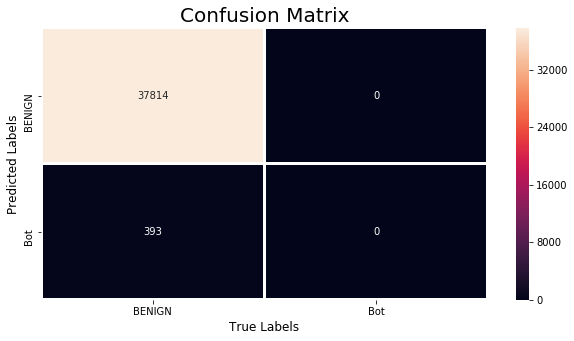

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

      BENIGN       0.99      1.00      0.99     37814
         Bot       0.00      0.00      0.00       393

   micro avg       0.99      0.99      0.99     38207
   macro avg       0.49      0.50      0.50     38207
weighted avg       0.98      0.99      0.98     38207

Accuracy 0.9897139267673463
Avg. Precision 0.9897, Avg. Recall 0.9897
RF ALGORITHM


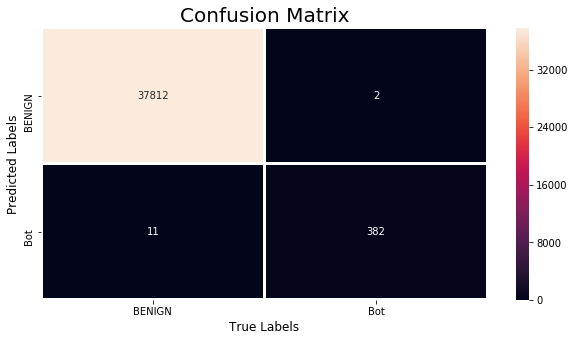

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     37814
         Bot       0.99      0.97      0.98       393

   micro avg       1.00      1.00      1.00     38207
   macro avg       1.00      0.99      0.99     38207
weighted avg       1.00      1.00      1.00     38207

Accuracy 0.9996597482136781
Avg. Precision 0.9997, Avg. Recall 0.9997
NEURAL-NETWORK ALGORITHM


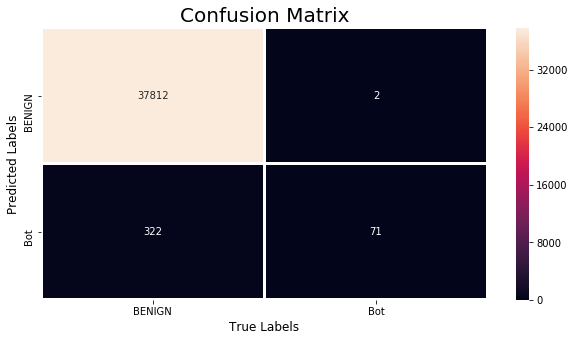

              precision    recall  f1-score   support

      BENIGN       0.99      1.00      1.00     37814
         Bot       0.97      0.18      0.30       393

   micro avg       0.99      0.99      0.99     38207
   macro avg       0.98      0.59      0.65     38207
weighted avg       0.99      0.99      0.99     38207

Accuracy 0.9915198785562855
Avg. Precision 0.9915, Avg. Recall 0.9915
LDA ALGORITHM


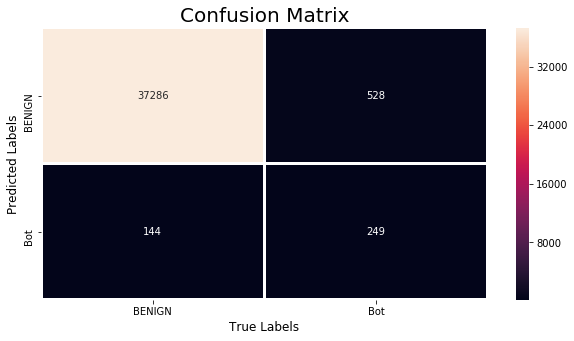

              precision    recall  f1-score   support

      BENIGN       1.00      0.99      0.99     37814
         Bot       0.32      0.63      0.43       393

   micro avg       0.98      0.98      0.98     38207
   macro avg       0.66      0.81      0.71     38207
weighted avg       0.99      0.98      0.99     38207

Accuracy 0.9824115999685922
Avg. Precision 0.9824, Avg. Recall 0.9824
KNN ALGORITHM


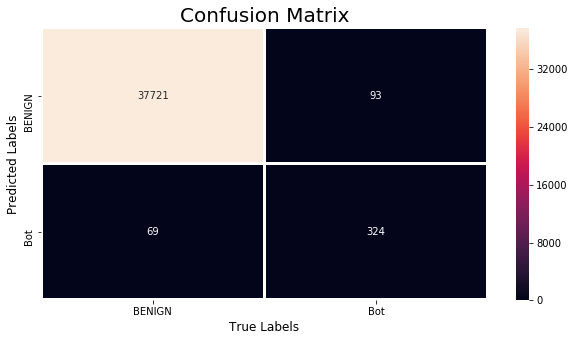

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     37814
         Bot       0.78      0.82      0.80       393

   micro avg       1.00      1.00      1.00     38207
   macro avg       0.89      0.91      0.90     38207
weighted avg       1.00      1.00      1.00     38207

Accuracy 0.9957599392781428
Avg. Precision 0.9958, Avg. Recall 0.9958
NAIVE-BAYES ALGORITHM


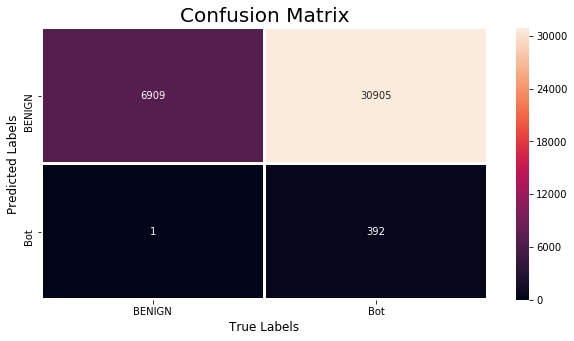

              precision    recall  f1-score   support

      BENIGN       1.00      0.18      0.31     37814
         Bot       0.01      1.00      0.02       393

   micro avg       0.19      0.19      0.19     38207
   macro avg       0.51      0.59      0.17     38207
weighted avg       0.99      0.19      0.31     38207

Accuracy 0.19109063784123329
Avg. Precision 0.1911, Avg. Recall 0.1911
DECISION-TREE ALGORITHM


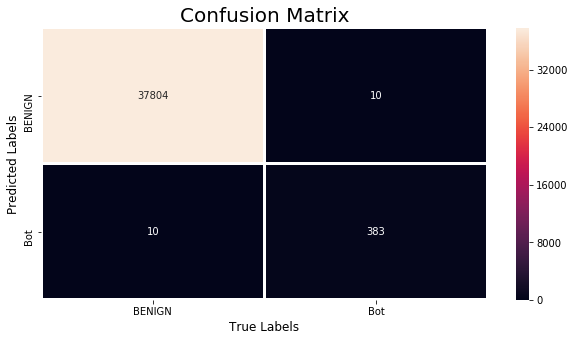

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     37814
         Bot       0.97      0.97      0.97       393

   micro avg       1.00      1.00      1.00     38207
   macro avg       0.99      0.99      0.99     38207
weighted avg       1.00      1.00      1.00     38207

Accuracy 0.9994765357133509
Avg. Precision 0.9995, Avg. Recall 0.9995
ADA ALGORITHM


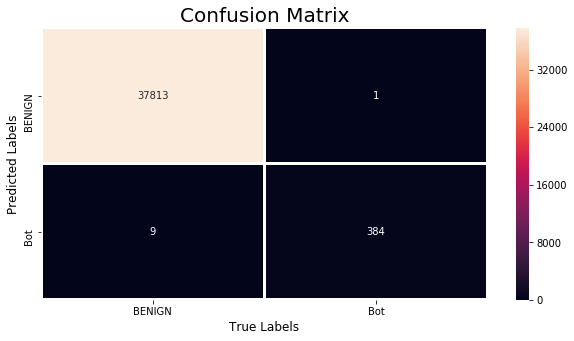

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     37814
         Bot       1.00      0.98      0.99       393

   micro avg       1.00      1.00      1.00     38207
   macro avg       1.00      0.99      0.99     38207
weighted avg       1.00      1.00      1.00     38207

Accuracy 0.9997382678566755
Avg. Precision 0.9997, Avg. Recall 0.9997
XGB ALGORITHM


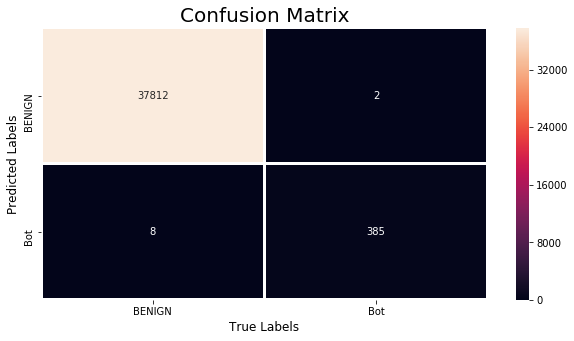

              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     37814
         Bot       0.99      0.98      0.99       393

   micro avg       1.00      1.00      1.00     38207
   macro avg       1.00      0.99      0.99     38207
weighted avg       1.00      1.00      1.00     38207

Accuracy 0.9997382678566755
Avg. Precision 0.9997, Avg. Recall 0.9997


In [115]:
for x, y in models.items():
    print(x.upper(), "ALGORITHM")
    y.fit(X_train,y_train)
    y_pred[x] = y.predict(X_test)
    y_prob[x] = y.predict_proba(X_test)
    predicted_labels = y.predict(X_test)
    cf_matrix[x] = confusion_matrix(y_test, predicted_labels)
    a = ConfusionMatrix(pd.DataFrame(cf_matrix[x], index=classes, columns=classes))
    b=a.matrix
    plt.figure(figsize=(10,5))
    sns.heatmap(b, annot=True, linewidths=2.0, fmt = "d")
    plt.title("Confusion Matrix", fontsize=20)
    plt.xlabel("True Labels", fontsize=12) 
    plt.ylabel("Predicted Labels", fontsize=12)
    plt.show()
    print(classification_report(y_test, predicted_labels, target_names = classes))
    print("Accuracy", accuracy_score(y_test, predicted_labels))
    avg_precision[x] = precision_score(y_test, y_pred[x], average='micro')
    avg_recall[x] = recall_score(y_test, y_pred[x], average='micro')
    print('Avg. Precision {:0.4f}, Avg. Recall {:0.4f}'.format(avg_precision[x], avg_recall[x]))


In [116]:
def plot_roc_curve(y_test, y_pred_proba):
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba)
    plt.figure(2)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_xgb, tpr_xgb)
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve')
    plt.legend(loc='best')
    plt.show()

def plot_calibration_cure(y_test, y_pred_proba):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test, y_pred_proba, n_bins=10)
    
    plt.ylabel("Fraction of positives")
    plt.ylim([-0.05, 1.05])
    plt.plot(mean_predicted_value, fraction_of_positives, "s-")
    plt.legend(loc="lower right")
    plt.title(' Calibration plots  (reliability curve)')
    plt.show()

In [117]:
for x in models.keys():
    y_prob[x] = np.asarray([line[1] for line in y_prob[x]])

No handles with labels found to put in legend.


logreg ALGORITHM


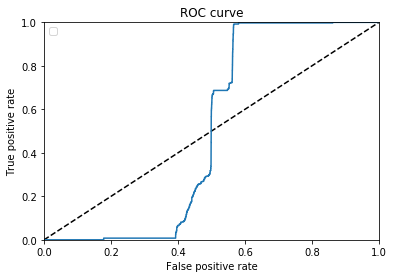

No handles with labels found to put in legend.


logreg ALGORITHM


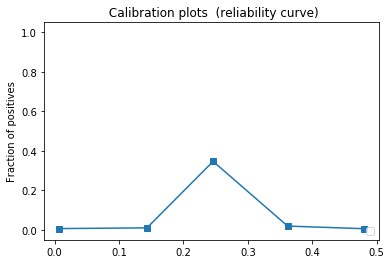

No handles with labels found to put in legend.


rf ALGORITHM


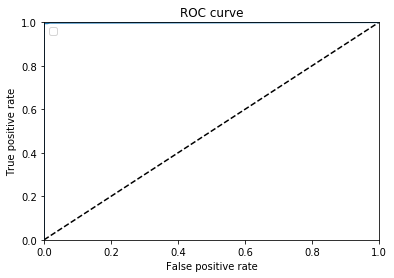

No handles with labels found to put in legend.


rf ALGORITHM


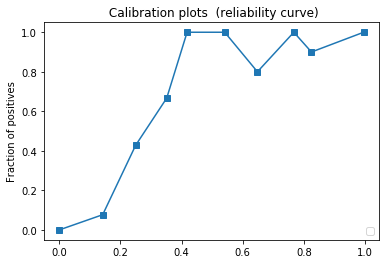

No handles with labels found to put in legend.


Neural-Network ALGORITHM


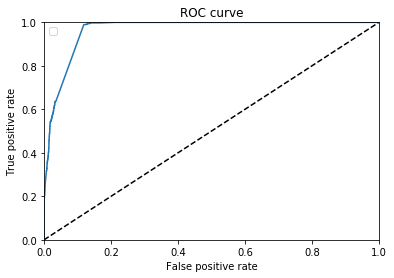

No handles with labels found to put in legend.


Neural-Network ALGORITHM


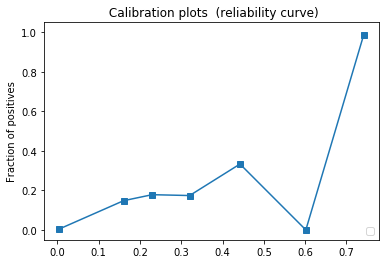

No handles with labels found to put in legend.


LDA ALGORITHM


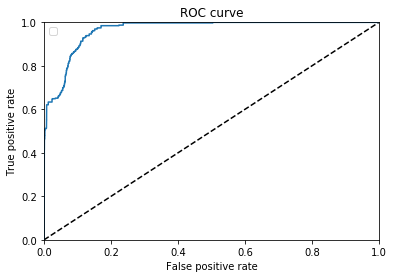

No handles with labels found to put in legend.


LDA ALGORITHM


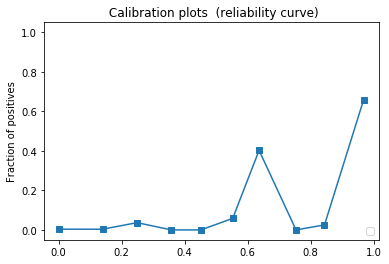

No handles with labels found to put in legend.


KNN ALGORITHM


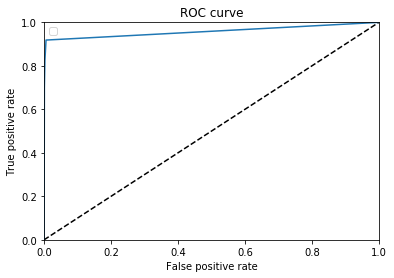

No handles with labels found to put in legend.


KNN ALGORITHM


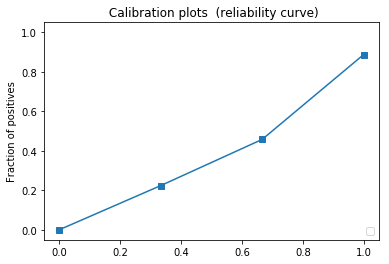

No handles with labels found to put in legend.


Naive-Bayes ALGORITHM


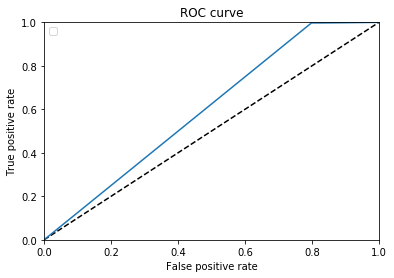

No handles with labels found to put in legend.


Naive-Bayes ALGORITHM


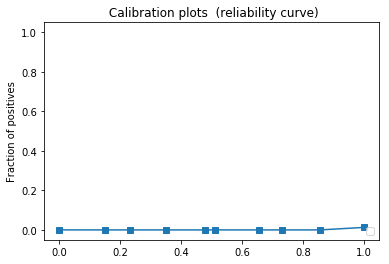

No handles with labels found to put in legend.


Decision-Tree ALGORITHM


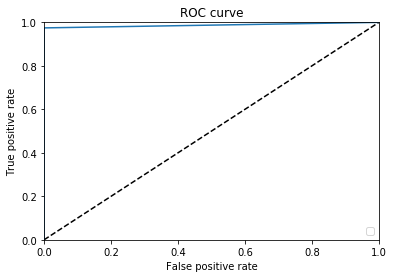

Decision-Tree ALGORITHM


No handles with labels found to put in legend.


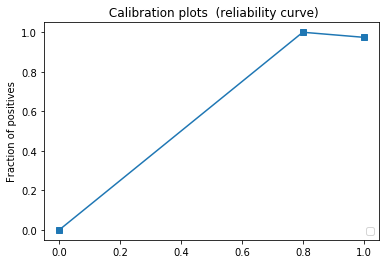

No handles with labels found to put in legend.


ada ALGORITHM


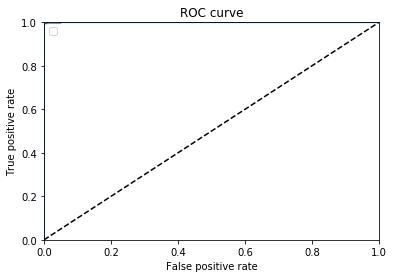

No handles with labels found to put in legend.


ada ALGORITHM


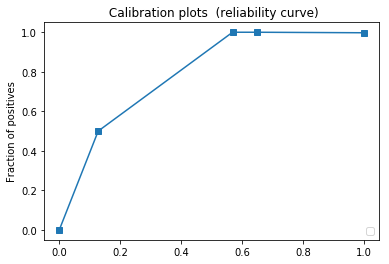

No handles with labels found to put in legend.


xgb ALGORITHM


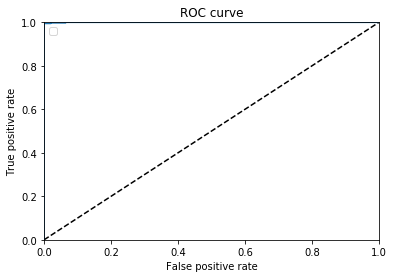

No handles with labels found to put in legend.


xgb ALGORITHM


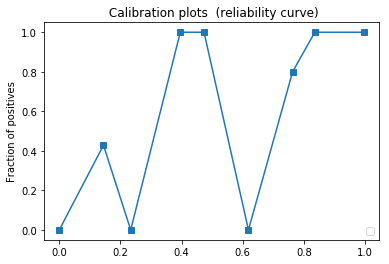

In [118]:
for x, y in models.items():
    print(x, "ALGORITHM")
    plot_roc_curve(y_test, y_prob[x])
    print(x, "ALGORITHM")
    plot_calibration_cure(y_test, y_prob[x])
    

[5.23628025e-02 6.48313033e-02 2.85595943e-02 7.95210015e-02
 9.81023566e-03 6.36413973e-02 2.23785587e-02 1.95316068e-02
 1.87576994e-02 5.17127497e-02 3.35535055e-02 9.70051791e-02
 1.77435168e-04 6.48424571e-04 9.97526884e-03 5.91152194e-03
 8.23358459e-03 1.97105011e-07 6.75510921e-03 1.54691764e-01
 1.70331997e-01 8.92694666e-02 2.85499317e-03 1.53035047e-04
 3.57546396e-03 2.03142676e-04 5.55296203e-03]
[1.70331997e-01 1.54691764e-01 9.70051791e-02 8.92694666e-02
 7.95210015e-02 6.48313033e-02 6.36413973e-02 5.23628025e-02
 5.17127497e-02 3.35535055e-02 2.85595943e-02 2.23785587e-02
 1.95316068e-02 1.87576994e-02 9.97526884e-03 9.81023566e-03
 8.23358459e-03 6.75510921e-03 5.91152194e-03 5.55296203e-03
 3.57546396e-03 2.85499317e-03 6.48424571e-04 2.03142676e-04
 1.77435168e-04 1.53035047e-04 1.97105011e-07]


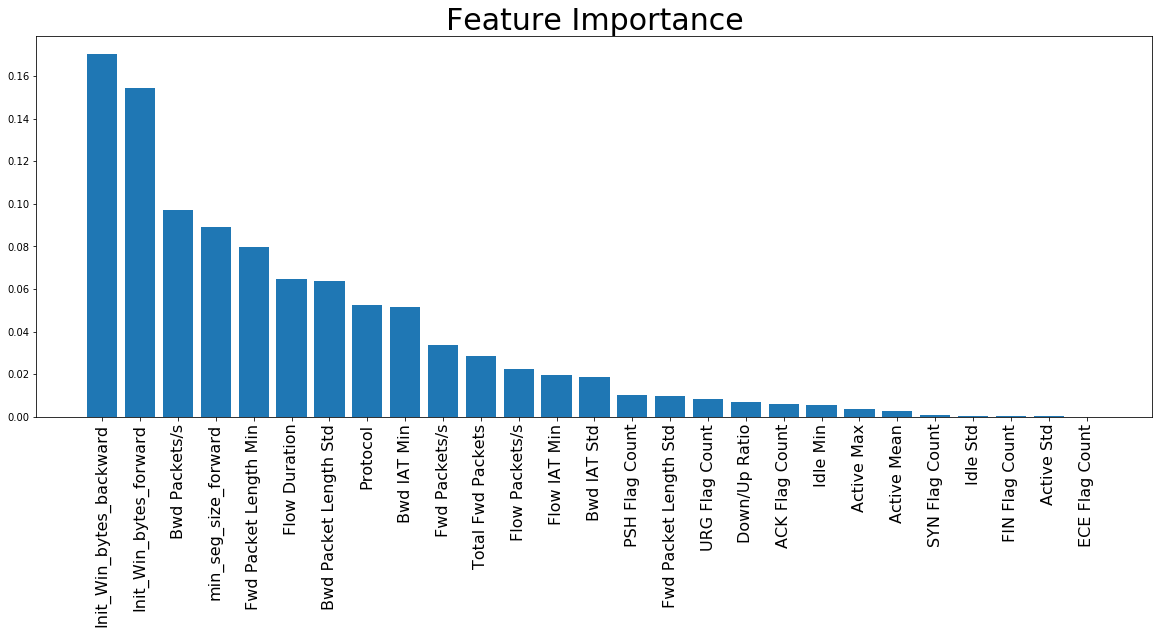

In [119]:
importances = rf_clf.feature_importances_
print(importances)
indices = np.argsort(rf_clf.feature_importances_)[::-1]
pos = np.arange(len(importances))
plt.figure(figsize=(20, 7))
plt.bar(pos, importances[indices], align="center")
print(importances[indices])
plt.xticks(range(0, len(encoded_df.columns)-1),
           encoded_df.columns[encoded_df.columns != 'theme'][indices],
           rotation=90, fontsize= 16)
plt.title("Feature Importance", {"fontsize": 30});
plt.show()

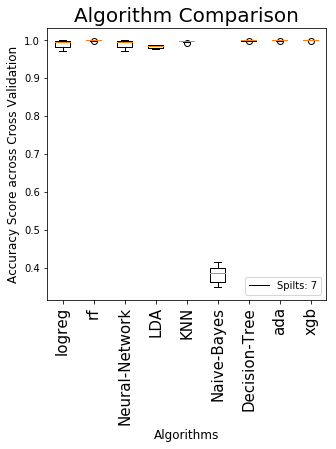

In [120]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
plt.boxplot(results_dict.values())
ax.set_xticklabels(results_dict.keys(), rotation = 90, fontsize=15)
plt.title("Algorithm Comparison", fontsize=20)
plt.xlabel("Algorithms", fontsize=12) 
plt.ylabel("Accuracy Score across Cross Validation", fontsize=12)
plt.legend(['Spilts: 7'],loc="lower right", frameon = True, fancybox = True)
plt.show()
print("")